<a href="https://colab.research.google.com/github/sevenZHQ1018/hangqi-zhang/blob/main/Class5_lab5_hangqi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

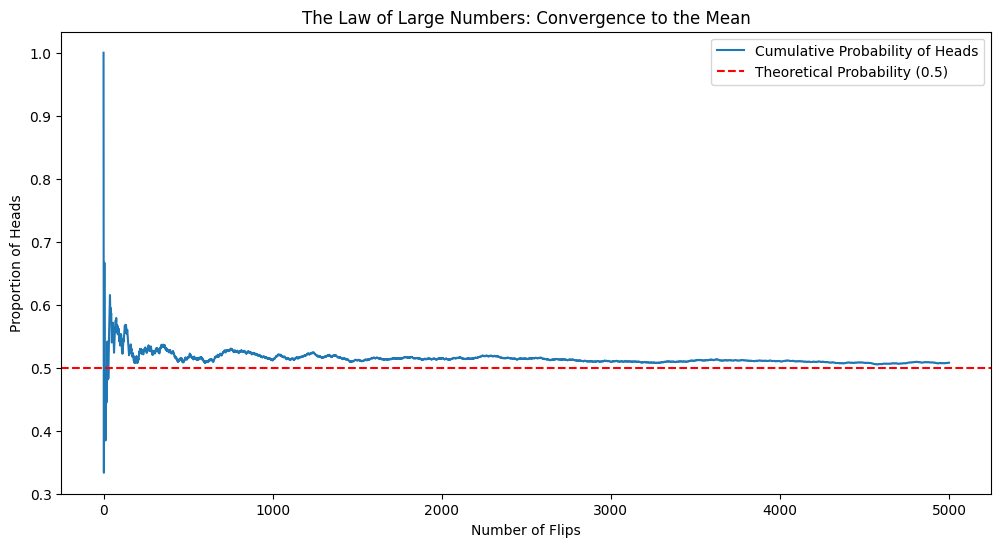

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_law_of_large_numbers(n_flips):
    # Simulate n_flips of a fair coin (0 or 1)
    flips = np.random.randint(0, 2, size=n_flips)

    # Calculate cumulative average
    # cumsum adds them up sequentially
    # Divide by range(1, n+1) to get average at each step
    cumulative_averages = np.cumsum(flips) / np.arange(1, n_flips + 1)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_averages, label='Cumulative Probability of Heads')
    plt.axhline(0.5, color='red', linestyle='--', label='Theoretical Probability (0.5)')
    plt.title('The Law of Large Numbers: Convergence to the Mean')
    plt.xlabel('Number of Flips')
    plt.ylabel('Proportion of Heads')
    plt.legend()
    plt.show()

# Run the simulation
simulate_law_of_large_numbers(5000)

In [6]:
def monty_hall_sim(n_games):
    switch_wins = 0
    stay_wins = 0

    for _ in range(n_games):
        doors = [0, 1, 2]
        prize = np.random.choice(doors)
        choice = np.random.choice(doors)

        # Host opens a door
        # Host cannot open 'prize' and cannot open 'choice'
        openable_doors = [d for d in doors if d != prize and d != choice]
        host_opens = np.random.choice(openable_doors)

        # Strategy: Stay
        if choice == prize:
            stay_wins += 1

        # Strategy: Switch
        # The switch choice is the door that is not 'choice' and not 'host_opens'
        switch_choice = [d for d in doors if d != choice and d != host_opens]
        if switch_choice[0] == prize:
            switch_wins += 1

    print(f"Win Rate (Stay): {stay_wins/n_games:.2%}")
    print(f"Win Rate (Switch): {switch_wins/n_games:.2%}")

monty_hall_sim(10000)

Win Rate (Stay): 32.79%
Win Rate (Switch): 67.21%


Probability of Revenue Decline: 17.23%
95% Value at Risk (Worst Case): $9,620,115.13


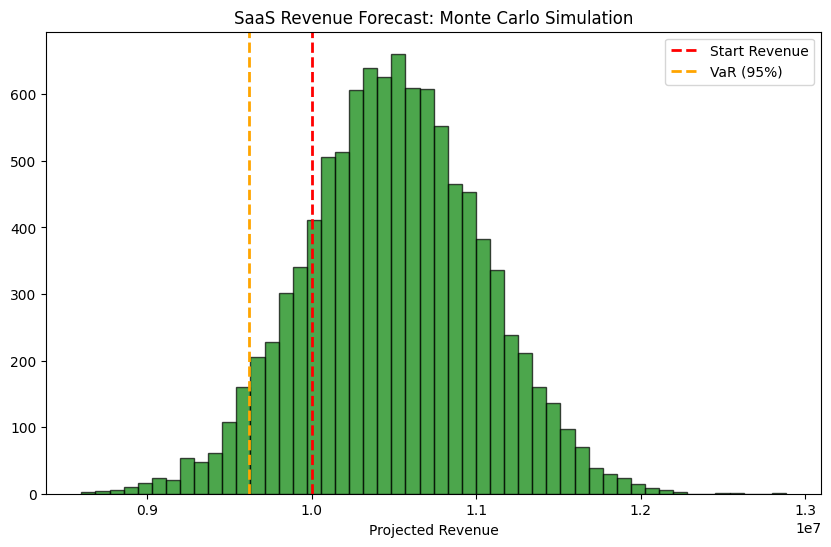

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def saas_risk_model(n_sims):
    base_rev = 10_000_000

    # Stochastic Inputs
    # Churn is centered at 10% but can vary (Standard Deviation 2%)
    churn_sims = np.random.normal(0.10, 0.02, n_sims)
    # Sales centered at $1.5M, varies by $500k
    sales_sims = np.random.normal(1_500_000, 500_000, n_sims)

    # The Transfer Function (The Business Logic)
    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    # Risk Metrics
    # Probability that we end the year with LESS money than we started
    prob_loss = np.mean(net_revenue < base_rev)

    # Value at Risk (95% Confidence)
    # We are 95% sure revenue will be ABOVE this number (the 5th percentile)
    var_95 = np.percentile(net_revenue, 5)

    # Mean Revenue for comparison
    mean_revenue = np.mean(net_revenue)

    print(f"Probability of Revenue Decline: {prob_loss:.2%}")
    print(f"95% Value at Risk (Worst Case): ${var_95:,.2f}")

    # Visualization
    plt.figure(figsize=(10,6))
    plt.hist(net_revenue, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
    plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
    plt.title('SaaS Revenue Forecast: Monte Carlo Simulation')
    plt.xlabel('Projected Revenue')
    plt.legend()
    plt.show()

    return {
        'net_revenue': net_revenue,
        'prob_loss': prob_loss,
        'var_95': var_95,
        'mean_revenue': mean_revenue
    }

# Run the simulation and capture results
results_normal = saas_risk_model(10000)


SaaS Business Risk Analysis - Fat Tail Model (n=10,000)
Base Revenue: $10,000,000.00

Forecast Statistics:
  Mean Projected Revenue: $10,500,206.16
  Median Revenue: $10,505,684.67
  Standard Deviation: $869,554.56

Risk Metrics:
  Probability of Revenue Decline: 21.03%
  95% Value at Risk (VaR): $9,263,259.48
  Potential Maximum Loss (5% probability): $736,740.52


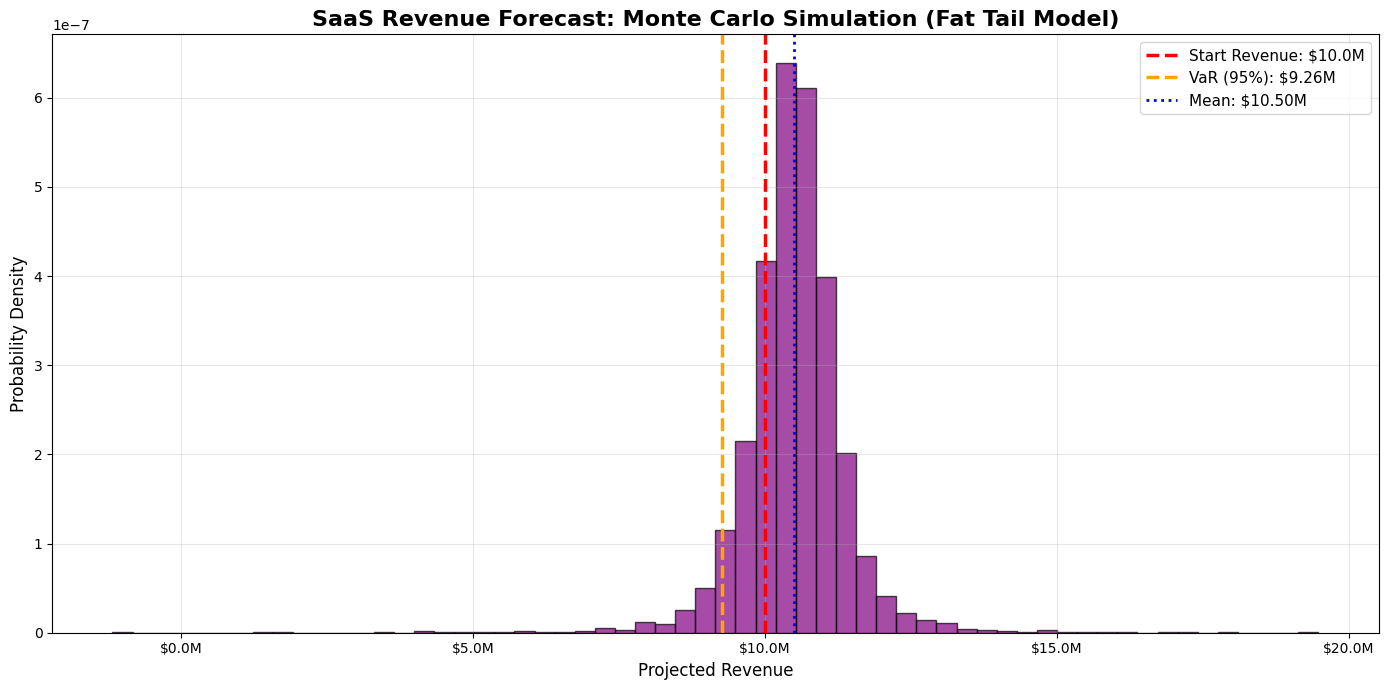

In [8]:
def saas_risk_model_fat_tails(n_sims):
    """
    Monte Carlo risk analysis for SaaS business - using fat-tail distribution (Student's t)

    Parameters:
        n_sims: Number of simulations
    """
    base_rev = 10_000_000  # Base revenue: $10 million

    # Stochastic Inputs
    # Churn rate: keep normal distribution
    churn_sims = np.random.normal(0.10, 0.02, n_sims)

    # Sales: use Student's t-distribution (df=3, heavier tails)
    # Standardize and scale to match sales magnitude
    sales_t = np.random.standard_t(df=3, size=n_sims)
    # Scale and shift to match mean and standard deviation
    sales_sims = 1_500_000 + sales_t * 500_000

    # The Transfer Function (Business Logic)
    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    # Risk Metrics
    prob_loss = np.mean(net_revenue < base_rev)
    var_95 = np.percentile(net_revenue, 5)

    # Other statistics
    mean_revenue = np.mean(net_revenue)
    median_revenue = np.median(net_revenue)
    std_revenue = np.std(net_revenue)

    print(f"\nSaaS Business Risk Analysis - Fat Tail Model (n={n_sims:,})")
    print("=" * 60)
    print(f"Base Revenue: ${base_rev:,.2f}")
    print(f"\nForecast Statistics:")
    print(f"  Mean Projected Revenue: ${mean_revenue:,.2f}")
    print(f"  Median Revenue: ${median_revenue:,.2f}")
    print(f"  Standard Deviation: ${std_revenue:,.2f}")
    print(f"\nRisk Metrics:")
    print(f"  Probability of Revenue Decline: {prob_loss:.2%}")
    print(f"  95% Value at Risk (VaR): ${var_95:,.2f}")
    print(f"  Potential Maximum Loss (5% probability): ${base_rev - var_95:,.2f}")

    # Visualization
    plt.figure(figsize=(14, 7))
    plt.hist(net_revenue, bins=60, alpha=0.7, color='purple', edgecolor='black', density=True)
    plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2.5, label=f'Start Revenue: ${base_rev/1e6:.1f}M')
    plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2.5, label=f'VaR (95%): ${var_95/1e6:.2f}M')
    plt.axvline(mean_revenue, color='blue', linestyle='dotted', linewidth=2, label=f'Mean: ${mean_revenue/1e6:.2f}M')

    plt.title('SaaS Revenue Forecast: Monte Carlo Simulation (Fat Tail Model)', fontsize=16, fontweight='bold')
    plt.xlabel('Projected Revenue', fontsize=12)
    plt.ylabel('Probability Density', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)

    # Format x-axis labels
    ax = plt.gca()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

    plt.tight_layout()
    plt.show()

    return {
        'net_revenue': net_revenue,
        'prob_loss': prob_loss,
        'var_95': var_95,
        'mean_revenue': mean_revenue
    }

# Run simulation - Fat tail distribution
results_fat_tail = saas_risk_model_fat_tails(10000)

In [11]:
# Compare the two models
print("\n" + "="*70)
print("Model Comparison: Normal Distribution vs Fat Tails")
print("="*70)

comparison_data = {
    'Metric': ['VaR (95%)', 'Mean Revenue', 'Prob of Revenue Decline'],
    'Normal Distribution': [
        f"${results_normal['var_95']:,.2f}",
        f"${results_normal['mean_revenue']:,.2f}",
        f"{results_normal['prob_loss']:.2%}"
    ],
    'Fat Tail Distribution': [
        f"${results_fat_tail['var_95']:,.2f}",
        f"${results_fat_tail['mean_revenue']:,.2f}",
        f"{results_fat_tail['prob_loss']:.2%}"
    ]
}

print(f"\n{'Metric':<25} {'Normal Distribution':<30} {'Fat Tail Distribution':<30}")
print("-" * 85)
for metric, normal, fat_tail in zip(comparison_data['Metric'], comparison_data['Normal Distribution'], comparison_data['Fat Tail Distribution']):
    print(f"{metric:<25} {normal:<30} {fat_tail:<30}")

# Calculate VaR difference
var_difference = results_normal['var_95'] - results_fat_tail['var_95']
var_pct_difference = (var_difference / results_normal['var_95']) * 100

print(f"\nVaR Difference: ${var_difference:,.2f} ({var_pct_difference:.2f}%)")
print(f"\nInterpretation: The fat-tail model has a lower VaR, meaning the risk of extreme negative")
print(f"scenarios is higher. The company needs additional capital buffer: ${var_difference:,.2f}")


Model Comparison: Normal Distribution vs Fat Tails

Metric                    Normal Distribution            Fat Tail Distribution         
-------------------------------------------------------------------------------------
VaR (95%)                 $9,620,115.13                  $9,263,259.48                 
Mean Revenue              $10,499,416.14                 $10,500,206.16                
Prob of Revenue Decline   17.23%                         21.03%                        

VaR Difference: $356,855.65 (3.71%)

Interpretation: The fat-tail model has a lower VaR, meaning the risk of extreme negative
scenarios is higher. The company needs additional capital buffer: $356,855.65


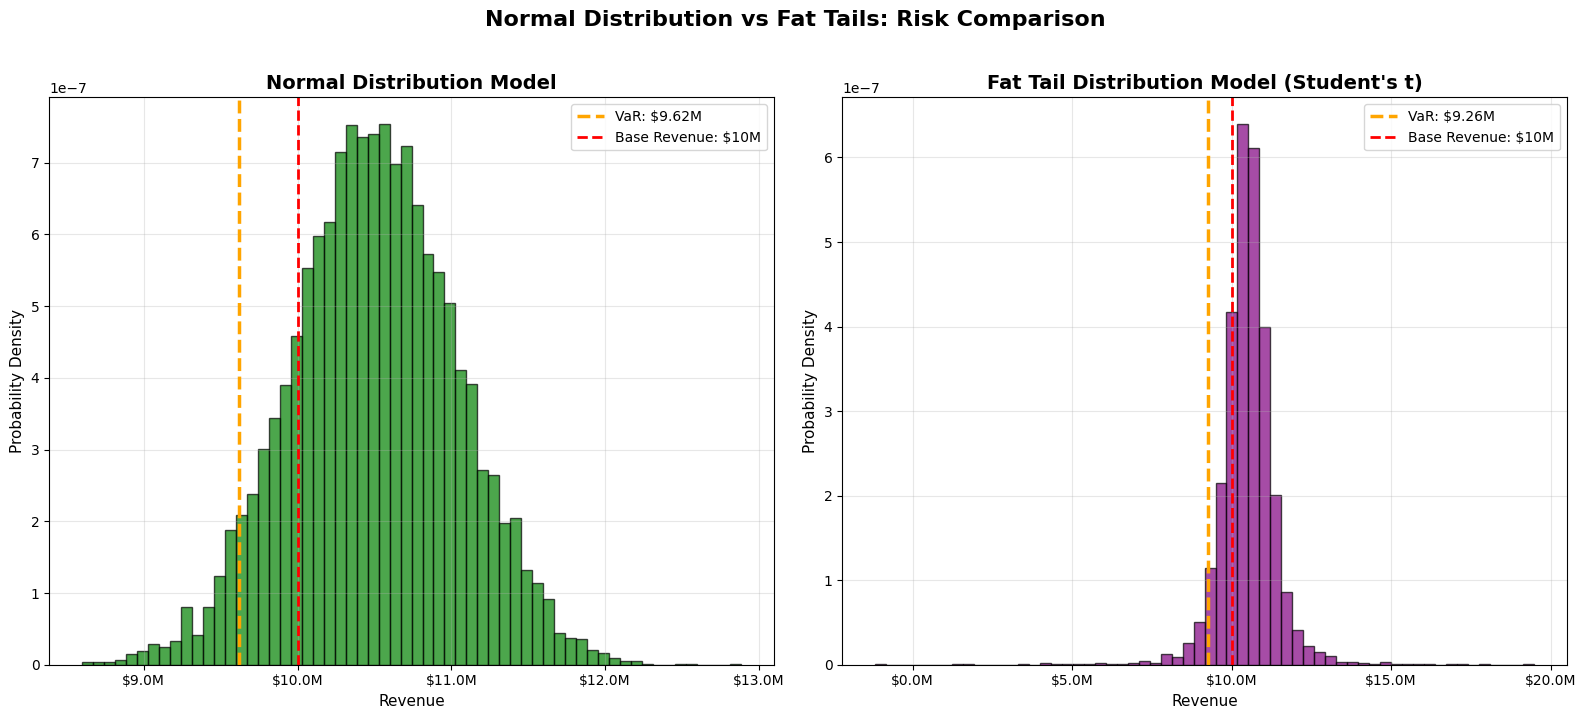

In [12]:
# Side-by-side comparison visualization
plt.figure(figsize=(16, 7))

# Subplot 1: Normal distribution
plt.subplot(1, 2, 1)
plt.hist(results_normal['net_revenue'], bins=60, alpha=0.7, color='green', edgecolor='black', density=True)
plt.axvline(results_normal['var_95'], color='orange', linestyle='dashed', linewidth=2.5,
            label=f"VaR: ${results_normal['var_95']/1e6:.2f}M")
plt.axvline(10_000_000, color='red', linestyle='dashed', linewidth=2, label='Base Revenue: $10M')
plt.title('Normal Distribution Model', fontsize=14, fontweight='bold')
plt.xlabel('Revenue', fontsize=11)
plt.ylabel('Probability Density', fontsize=11)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
ax1 = plt.gca()
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Subplot 2: Fat tail distribution
plt.subplot(1, 2, 2)
plt.hist(results_fat_tail['net_revenue'], bins=60, alpha=0.7, color='purple', edgecolor='black', density=True)
plt.axvline(results_fat_tail['var_95'], color='orange', linestyle='dashed', linewidth=2.5,
            label=f"VaR: ${results_fat_tail['var_95']/1e6:.2f}M")
plt.axvline(10_000_000, color='red', linestyle='dashed', linewidth=2, label='Base Revenue: $10M')
plt.title('Fat Tail Distribution Model (Student\'s t)', fontsize=14, fontweight='bold')
plt.xlabel('Revenue', fontsize=11)
plt.ylabel('Probability Density', fontsize=11)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
ax2 = plt.gca()
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

plt.suptitle('Normal Distribution vs Fat Tails: Risk Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()